In [1]:
import numpy as np
import random
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

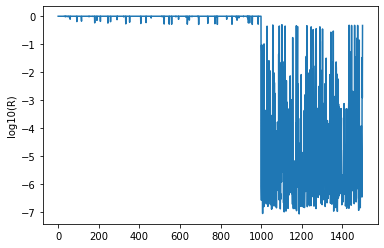

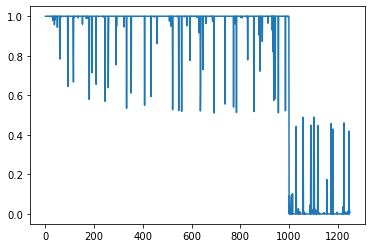

In [13]:
def random_filtered_vectors(M, N, filter_order=12):
    c_i = np.exp(2*filter_order*np.sqrt(1-np.linspace(0, 1, N)**2))
    a_subspace = np.diag(c_i*np.random.rand(N))
    outside_subspace = np.random.rand(M-N, N)
    filtered_vecs = np.concatenate((a_subspace, outside_subspace), axis=0)
    filtered_vecs = filtered_vecs/np.linalg.norm(filtered_vecs, axis=0)
    return filtered_vecs


filter_order = 10
ratio = 0.1
M = 10000
N = int(M*ratio)
N_dep = int(0.5*N)

filtered_vecs_ind = random_filtered_vectors(M, N, filter_order=filter_order)
filtered_vecs_dep = random_filtered_vectors(M, N_dep, filter_order=filter_order)
filtered_vecs_ind = filtered_vecs_ind[:, np.random.permutation(N)]
filtered_vecs_dep = filtered_vecs_dep[:, np.random.permutation(N_dep)]


filtered_vecs_dep.shape
filtered_vecs = np.concatenate((filtered_vecs_ind, filtered_vecs_dep), axis=1)

q, r = np.linalg.qr(filtered_vecs)

plt.plot(np.log10(np.abs(np.diag(r))))
plt.ylabel('log10(R)')
plt.show()
plt.plot(np.abs(np.diag(r))[:int(1.25*N)])